In [5]:
!pip install pandas

  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Using cached numpy-1.24.2-cp310-cp310-win_amd64.whl (14.8 MB)



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import sys, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4CB4-937C

 c:\Users\gmk_0\OneDrive\바탕 화면\myWork\아주대학교\4-1\파란학기\PRADA_AI\Codes\EDA 디렉터리

2023-03-17  오후 01:01    <DIR>          .
2023-03-17  오후 12:59    <DIR>          ..
2023-03-17  오후 01:14             3,921 eda.ipynb
               1개 파일               3,921 바이트
               2개 디렉터리  75,285,876,736 바이트 남음


In [45]:
# 데이터 프레임 생성
df = pd.DataFrame(columns=["Cocktail", "User", "Review", "Timestamp"], index=None)

test_list = []

for file_num in range(5):
    file_num = str(file_num)
    # 파일 로드
    data_path = '..\..\Dataset\gutekueche_cocktail_reviews_'+file_num+'.json'
    dataset = pd.read_json(data_path, encoding='utf-8')
    cocktail_reviews = dataset["cocktail_reviews"]

    Cocktails = [x["Cocktail"] for x in cocktail_reviews]
    User = [x["User"] for x in cocktail_reviews]
    test_list.extend(User)
    Review = [x["Review"] for x in cocktail_reviews]
    Timestamp = [x["Timestamp"] for x in cocktail_reviews]

    # 데이터프레임 생성
    part_df = pd.DataFrame({"Cocktail":Cocktails, "User":User, "Review":1, "Timestamp":Timestamp}, index=None)

    # 데이터 프레임 합치기
    df = pd.concat([df, part_df], axis=0)

df = df.reset_index(drop=True)
    

In [46]:
test_list = list(set(test_list))
len(test_list)

130

In [44]:
# Utility Matrix 생성
utility_matrix = df.pivot_table(index='Cocktail', columns='User', values='Review', aggfunc='count', fill_value=0)
utility_matrix
    

User,-michi-,AMMER,Andreawowa,Anna-111,Artelsmair,Babsi45,Billie-Blue,Cheesy,ChristineKlotz,ChuChu690,...,sgr1909,snakeeleven,spicy-orange,sssumsi,tamixpanda,tine13,verena_w,wald-sophie,wyoimi,xblue
Cocktail,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


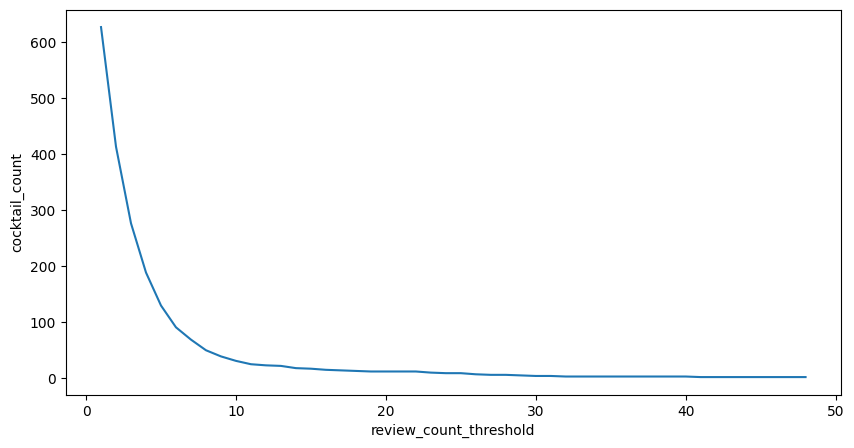

,리뷰 n개 이상,칵테일 수
0,1,627
1,2,413
2,3,276
3,4,188
4,5,129
5,6,90
6,7,68
7,8,49
8,9,38
9,10,30


In [85]:
review_count = utility_matrix.sum(axis=1)
review_count_threshold_list = []
review_count_list = []
# review_count 별 cocktail 개수
for review_count_threshold in range(1, max(review_count)+1):
    #print(review_count_threshold, review_count[review_count >= review_count_threshold].count())
    review_count_threshold_list.append(review_count_threshold)
    review_count_list.append(review_count[review_count >= review_count_threshold].count())

# review_count 별 cocktail 개수 그래프
plt.figure(figsize=(10, 5))
plt.plot(review_count_threshold_list, review_count_list)
plt.xlabel('review_count_threshold')
plt.ylabel('cocktail_count')
plt.show()

# review_count 별 cocktail 개수 테이블
review_count_df = pd.DataFrame({"리뷰 n개 이상":review_count_threshold_list, "칵테일 수":review_count_list})
review_count_df


    